<a href="https://colab.research.google.com/github/andreea-cochintele/IA/blob/master/ProjectDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import glob
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

from sklearn import preprocessing
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#path_test = '/content/gdrive/MyDrive/Colab Notebooks/nsynth-test/audio'
#path_train = '/content/gdrive/MyDrive/Colab Notebooks/nsynth-valid/audio'

path_test = '/content/gdrive/MyDrive/Colab/nsynth-test/audio'
path_train = '/content/gdrive/MyDrive/Colab/nsynth-valid/audio'


In [ ]:
no_filters1 = 1
no_filter2 = 50
no_neurons1 = 500
no_neurons2 = 500
class CNN(nn.Module):
    def __init__(self, 
               input_size: int, 
               output_size: int):
        super().__init__()
        self.conv1 = nn.Conv2d(input_size, no_filters1, 5, 1)
        self.conv2 = nn.Conv2d(no_filters1, no_filter2, 5, 1)
        self.fully_conv1  = nn.Conv2d(no_filter2,no_neurons1, 4)
        self.fully_conv2  = nn.Conv2d(no_neurons1, no_neurons2, 1)
        self.fully_conv3 = nn.Conv2d(no_neurons2, output_size, kernel_size=(5, 37))

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.fully_conv1(x))
        x = self.fully_conv2(x)
        x = F.relu(x)
        x = self.fully_conv3(x)
        
        return F.log_softmax(x, dim=1)
        #return x

In [ ]:
class FullyConnected(nn.Module):
  def __init__(self, 
               input_size: int, 
               output_size: int):
    super().__init__()
    self.fully_conected1=nn.Linear(in_features=input_size,out_features=128,bias=True)
    self.fully_conected2=nn.Linear(in_features=128,out_features=64,bias=True)
    self.fully_conected3=nn.Linear(in_features=64,out_features=32,bias=True)
    self.fully_conected4=nn.Linear(in_features=32,out_features=output_size,bias=True)
  def forward(self,x: torch.Tensor) ->torch.Tensor:
    h=self.fully_conected1(x)
    h=nn.ReLU()(h)
    h=self.fully_conected2(h)
    h=nn.ReLU()(h)
    h=self.fully_conected3(h)
    h=nn.ReLU()(h)
    h=self.fully_conected4(h)
    #return nn.functional.log_softmax(h,dim=1)
    return h
  

In [ ]:
import json
with open('/content/gdrive/MyDrive/Colab/nsynth-valid/examples.json') as f:
  datas = json.load(f)
labels_train = {}
for data in datas:
    labels_train[data + ".wav"] = (datas[data]["instrument_family"])
#labels_test = to_categorical(labels_test, 11)
print(labels_train)

{'keyboard_acoustic_004-060-025.wav': 4, 'bass_synthetic_033-050-100.wav': 0, 'bass_synthetic_009-052-050.wav': 0, 'keyboard_electronic_003-064-127.wav': 4, 'bass_synthetic_034-030-050.wav': 0, 'bass_synthetic_098-040-025.wav': 0, 'bass_synthetic_009-083-075.wav': 0, 'mallet_acoustic_062-033-075.wav': 5, 'organ_electronic_113-028-075.wav': 6, 'keyboard_electronic_098-072-100.wav': 4, 'organ_electronic_028-053-127.wav': 6, 'brass_acoustic_016-062-127.wav': 1, 'keyboard_electronic_001-086-025.wav': 4, 'bass_synthetic_134-091-127.wav': 0, 'organ_electronic_001-039-100.wav': 6, 'guitar_acoustic_015-089-050.wav': 3, 'bass_synthetic_098-048-075.wav': 0, 'bass_synthetic_009-094-100.wav': 0, 'string_acoustic_057-085-050.wav': 8, 'organ_electronic_001-048-075.wav': 6, 'brass_acoustic_016-054-025.wav': 1, 'keyboard_synthetic_000-097-025.wav': 4, 'organ_electronic_007-024-100.wav': 6, 'keyboard_electronic_001-067-075.wav': 4, 'keyboard_electronic_003-030-075.wav': 4, 'bass_synthetic_068-099-127.w

In [ ]:

with open('/content/gdrive/MyDrive/Colab/nsynth-test/examples.json') as f:
  datas = json.load(f)
labels_test = {}
for data in datas:
    labels_test[data+ ".wav"] = (datas[data]["instrument_family"])
#labels_test = to_categorical(labels_test, 11)
print(labels_test)

{'bass_synthetic_068-049-025.wav': 0, 'keyboard_electronic_001-021-127.wav': 4, 'guitar_acoustic_010-066-100.wav': 3, 'reed_acoustic_037-068-127.wav': 7, 'flute_acoustic_002-077-100.wav': 2, 'string_acoustic_056-047-075.wav': 8, 'vocal_synthetic_003-088-025.wav': 10, 'brass_acoustic_046-101-050.wav': 1, 'guitar_acoustic_014-070-050.wav': 3, 'string_acoustic_014-063-050.wav': 8, 'bass_synthetic_033-041-075.wav': 0, 'keyboard_electronic_001-063-075.wav': 4, 'keyboard_electronic_098-023-050.wav': 4, 'bass_synthetic_068-084-050.wav': 0, 'mallet_acoustic_062-066-050.wav': 5, 'guitar_electronic_028-086-100.wav': 3, 'flute_synthetic_000-053-025.wav': 2, 'guitar_acoustic_015-068-127.wav': 3, 'organ_electronic_057-056-127.wav': 6, 'organ_electronic_113-081-127.wav': 6, 'organ_electronic_001-060-127.wav': 6, 'bass_synthetic_009-090-075.wav': 0, 'bass_synthetic_135-071-100.wav': 0, 'keyboard_acoustic_004-058-127.wav': 4, 'guitar_acoustic_015-090-075.wav': 3, 'bass_synthetic_033-043-100.wav': 0, '

In [ ]:
print(len(labels_train))

12678


/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_056-047-127.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_056-045-075.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_014-051-025.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_014-051-075.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_014-049-050.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_056-044-127.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_056-046-100.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_056-044-050.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_056-057-050.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_056-046-127.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_014-029-127.wav
/content/gdrive/MyDrive/Colab/nsynth-valid/audio/string_acoustic_014-059-100.wav
/content/gdrive/MyDrive/Cola

KeyboardInterrupt: ignored

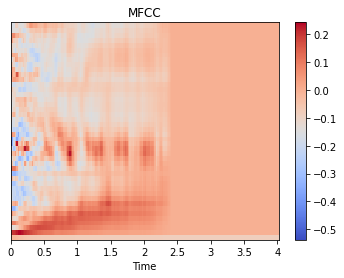

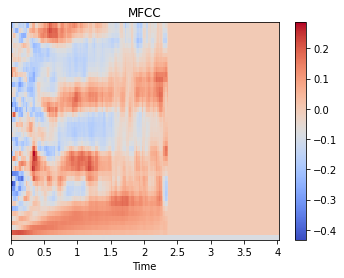

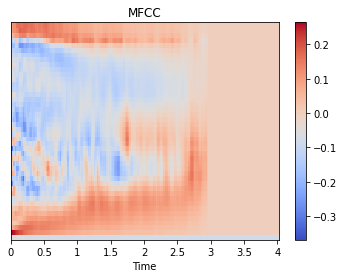

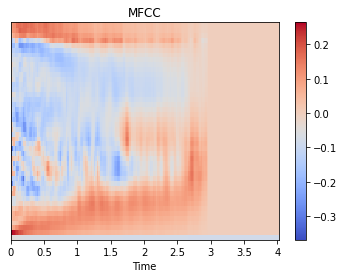

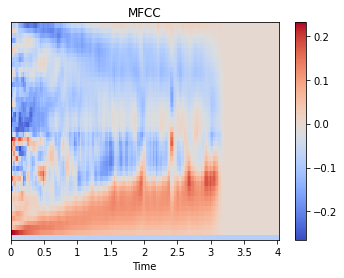

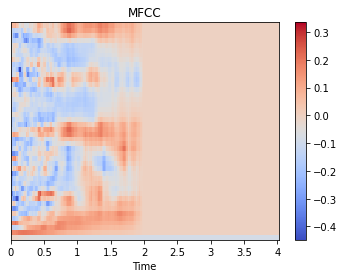

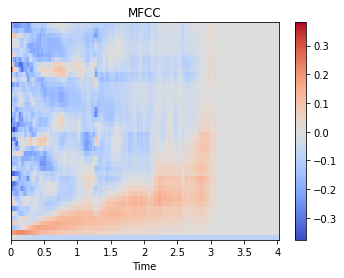

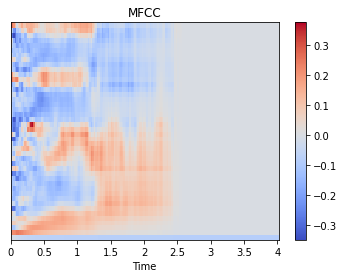

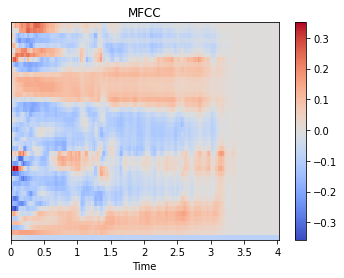

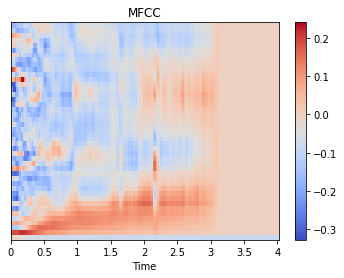

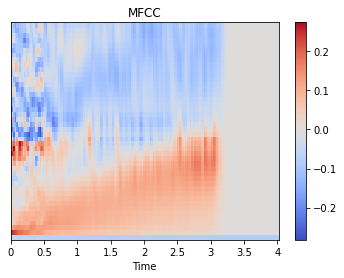

In [ ]:
train_names = []
train_labels  = []
train_data = []


ct = 0

for filepath in glob.glob(path_train + '/*.wav')[:6500]:
    print(filepath)
    # citim wav-urile
    data, sample_rate = librosa.load(filepath)
    # le transformam in mfcc
    spec_data = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=44)
    # retinem numele fisierului
    train_names.append(os.path.basename(filepath))
    # normalizam datele pentru a le aduce intre -1 si 1
    spec_data = preprocessing.normalize(spec_data)
    #spec_data_redim = spec_data.mean(1)
    #spec_data_redim=spec_data.reshape(spec_data.shape[0]*spec_data.shape[1],1)
	  #retinem datele
    train_data.append((os.path.basename(filepath), torch.Tensor(spec_data)))
    #reprezentam spectogramele
    if  ct <=10:
      fig, ax = plt.subplots()
      img = librosa.display.specshow(spec_data, x_axis='time', ax=ax)
      fig.colorbar(img, ax=ax)
      ax.set(title='MFCC')
      ct = ct + 1

In [ ]:
test_names = []
test_data = []
test_labels  = []

ct=0
for filepath in glob.glob(path_test + '/*.wav'):
    # citim wav-urile
    data, sample_rate = librosa.load(filepath)
    # le transformam in mfcc
    spec_data = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=44)
    # retinem numele fisierului
    test_names.append(os.path.basename(filepath))
    # normalizam datele pentru a le aduce intre -1 si 1
    spec_data = preprocessing.normalize(spec_data)
    
    #spec_data_redim = spec_data.mean(1)
  
    #spec_data_redim=spec_data.reshape(spec_data.shape[0]*spec_data.shape[1],1)
    test_data.append((os.path.basename(filepath), torch.Tensor(spec_data)))
    #reprezentam spectogramele
    if  ct <=10:
      fig, ax = plt.subplots()
      img = librosa.display.specshow(spec_data, x_axis='time', ax=ax)

      fig.colorbar(img, ax=ax)
      ax.set(title='MFCC')
      ct = ct + 1


In [ ]:
print(test_data[0][1].shape)

In [ ]:
np.random.shuffle(train_data)

In [ ]:
def get_batch_size_samples(data, batch_size, j):
  samples = torch.Tensor(batch_size,1, data[0][1].shape[0],data[0][1].shape[1])
  #print(samples.shape)
  for i in range(j*batch_size, (j+1)*batch_size):
    samples[i - j*batch_size][0] = data[i][1]
  #print(samples.shape)
  return samples

In [ ]:
def get_batch_size_labels(labels_train, data, batch_size, j):
  labels = []
  for i in range(j*batch_size, (j+1)*batch_size):
    labels.append(labels_train[data[i][0]])
  return labels

In [ ]:
print(len(train_data))

In [ ]:
#model=FullyConnected(input_size=train_data[0][1].shape[0],output_size=11)
model_CNN=CNN(input_size=1,output_size=11)
optimizer=torch.optim.Adam(model_CNN.parameters(), lr=0.01)

num_epochs=10
print_every=10
batch_size = 100
n_of_batches = int(len(train_data) / batch_size)
train_loss=[]
 
for i in range(num_epochs+1):
  accuracy = 0
  for j in range(n_of_batches):
  #for j in range(len(train_data)):
    optimizer.zero_grad()
    #output = model(get_batch_size_samples(train_data, batch_size, j))
    output = model_CNN(get_batch_size_samples(train_data, batch_size, j))
    #output = model_CNN(train_data[j][1].T)
    labels = get_batch_size_labels(labels_train, train_data, batch_size, j)
    labels = torch.Tensor(labels).long()
    #label = torch.Tensor([labels_train[train_data[j][0]]]).long()
    output = torch.squeeze(output)
    #print(torch.argmax(output, dim = 1))
    #print(labels)
    #print()
    
    #loss=torch.nn.functional.cross_entropy(output, labels)
    loss=torch.nn.functional.nll_loss(output, labels)
    #print(loss.shape)
    accuracy += torch.sum(torch.argmax(output, dim = 1) == labels)
    train_loss.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()
  print(f'EPOCH {i}:')
  print(f'loss = {loss.item()}')
  print(f'accuracy = {accuracy / len(train_data) * 100}')
plt.plot(train_loss)
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.show()


In [ ]:
#train_loss=[train_loss[i] for i in range (0,num_epochs*(n_of_batches-1),n_of_batches -1)]
#train_loss_t=torch.as_tensor(train_loss)
#train_loss_t=train_loss_t.view(31,39)
#train_loss_t=train_loss_t.mean(0)

#plt.plot([i for i in range(num_epochs+1)],train_loss_t)
#plt.xlabel('Epoca')
#plt.ylabel('Loss pentru primul batch')
#plt.show()


In [ ]:
accuracy_test = 0
batch_size = 100
n_of_batches = int(len(test_data) / batch_size)
for i in range(len(test_data)):
#for i in range(n_of_batches - 1):
  #output=model(get_batch_size_samples(test_data, batch_size, i))
  reshaped = torch.reshape(test_data[i][1], (1, 1, test_data[i][1].shape[0], test_data[i][1].shape[1]))
  output = model_CNN(reshaped)
  output = torch.squeeze(output)
  #label = get_batch_size_labels(labels_test, test_data, batch_size, i)
  #label = torch.Tensor(label).long()
  label = torch.Tensor([labels_test[test_data[i][0]]]).long()
  accuracy_test += torch.argmax(output) == label
  #accuracy_test += torch.sum(torch.argmax(output,dim=1) == label)
print(f'accuracy test = {accuracy_test / len(test_data) * 100}')
